# PEPCONF - Throughput Troubleshooting

In [1]:
import sys
sys.path.append('../../management/')

In [2]:
import management as mgt
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from qcportal import FractalClient

In [5]:
client = FractalClient()

In [6]:
ds = client.get_collection("OptimizationDataset", "OpenFF PEPCONF OptimizationDataset v1.0")

In [7]:
ds.status('default')

,default
INCOMPLETE,6670
COMPLETE,537
ERROR,353


In [8]:
ds.df

,default
CC(=O)N[C@@H](CCC(=O)[O-])C(=O)N[C@@H](Cc1ccccc1)C(N)=O-0,"OptimizationRecord(id='31712605', status='INCO..."
CC(=O)N[C@@H](CCC(=O)[O-])C(=O)N[C@@H](Cc1ccccc1)C(N)=O-1,"OptimizationRecord(id='31712606', status='INCO..."
CC(=O)N[C@@H](CO)C(=O)N[C@@H](CO)C(N)=O-0,"OptimizationRecord(id='31712607', status='COMP..."
CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O-0,"OptimizationRecord(id='31712608', status='INCO..."
CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O-1,"OptimizationRecord(id='31712609', status='INCO..."
...,...
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-8,"OptimizationRecord(id='31729737', status='INCO..."
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-9,"OptimizationRecord(id='31729738', status='INCO..."
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-10,"OptimizationRecord(id='31729739', status='INCO..."
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-11,"OptimizationRecord(id='31729740', status='INCO..."


In [9]:
opts = ds.df.default.tolist()

In [10]:
prov = {opt.id: opt.provenance.dict() for opt in opts if opt.provenance}

In [11]:
df_prov = pd.DataFrame(prov).T
df_prov

,creator,version,routine,cpu,qcengine_version,hostname,wall_time,username
31712607,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz,v0.17.0,lu10,9434.58,chodera
31712610,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,v0.17.0,hpc3-15-23,6031.03,tgokey
31712612,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,AMD EPYC 7552 48-Core Processor,v0.17.0,openff-qca-qm-5599bddb8-djvcn,7382.73,qcfractal
31712613,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,AMD EPYC 7552 48-Core Processor,v0.17.0,openff-qca-qm-5599bddb8-djvcn,11072.4,qcfractal
31712619,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) CPU X5560 @ 2.80GHz,v0.17.0,c-8-16,9869.27,tgokey
...,...,...,...,...,...,...,...,...
31717898,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,AMD Opteron(TM) Processor 6276,v0.17.0,c-15-37,92485.2,tgokey
31717904,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) CPU X5560 @ 2.80GHz,v0.17.0,c-17-38,168582,tgokey
31717907,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,AMD EPYC 7552 48-Core Processor,v0.17.0,openff-qca-qm-5599bddb8-72gf2,32725,qcfractal
31717956,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz,v0.17.0,lu06,34048.3,chodera


In [12]:
df_prov.username.value_counts()

tgokey       238
chodera      182
qcfractal    117
Name: username, dtype: int64

In [13]:
df_prov['wall_time_hours'] = df_prov.wall_time.astype(float)/3600

In [14]:
name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI'}

In [15]:
df_prov['resource'] = df_prov['username'].apply(lambda x: name_map[x])

## Walltime distributions by resource

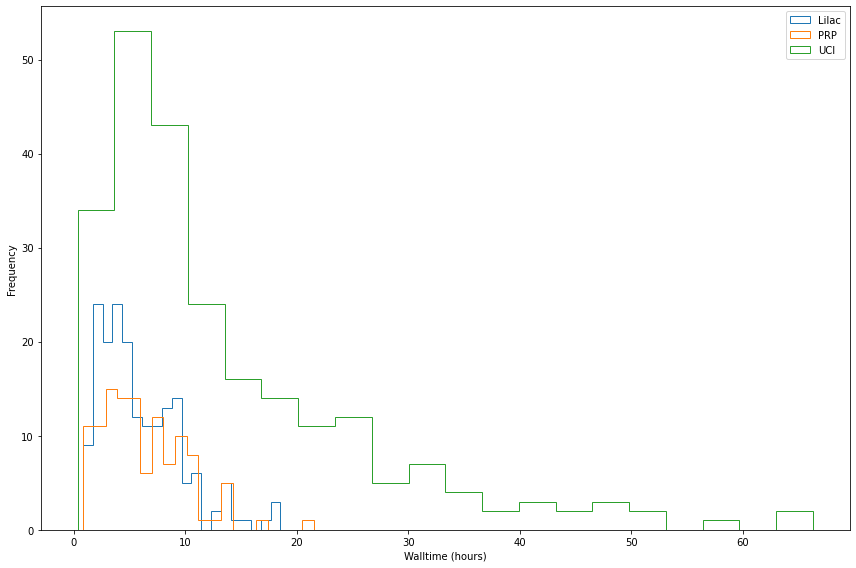

In [22]:
fig, ax = plt.subplots()

(df_prov.groupby('resource').wall_time_hours).plot.hist(bins=20, histtype='step', legend=True, figsize=(12, 8), ax=ax)

ax.set_xlabel("Walltime (hours)")

fig.tight_layout()
fig.savefig('walltime.pdf', dpi=300)

In [17]:
df_prov.wall_time_hours.describe()

count    537.000000
mean       9.440686
std        9.458985
min        0.353987
25%        3.830847
50%        6.763941
75%       10.745738
max       66.259650
Name: wall_time_hours, dtype: float64

## Measuring Throughput

In [23]:
modified_on = {opt.id: opt.modified_on for opt in opts if opt.provenance}

In [24]:
df_prov['modified_on'] = pd.Series(modified_on)

In [25]:
df_prov.modified_on.describe()

/home/david/.conda/envs/qcsubmit-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                            537
unique                           532
top       2020-11-22 15:43:48.136388
freq                               2
first     2020-11-14 21:17:24.092340
last      2020-11-22 23:11:29.143949
Name: modified_on, dtype: object

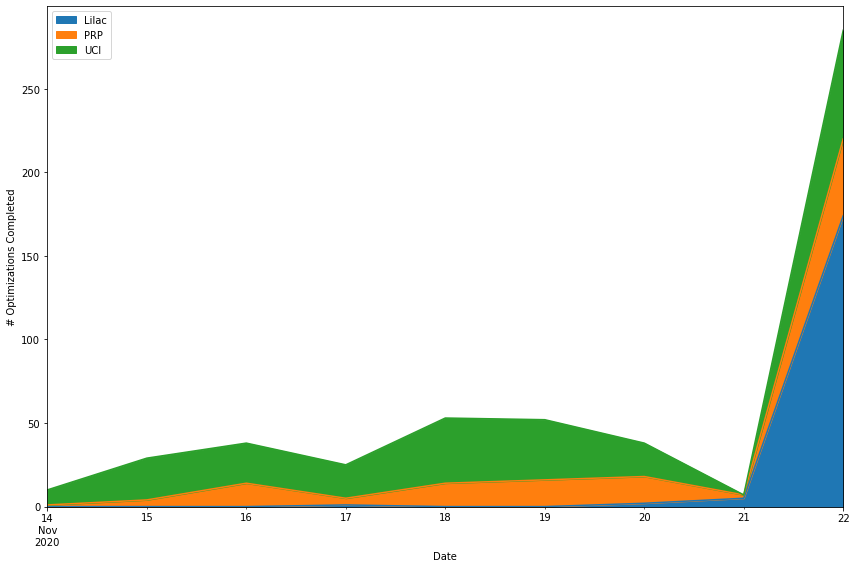

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))

name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI'}
counts = {}
for name, group in df_prov.reset_index().set_index('modified_on').groupby('username'):
    counts[name_map[name]] = group.groupby((pd.Grouper(freq='D')))['index'].count()

counts = pd.DataFrame(counts)
counts.plot.area(ax=ax)
ax.legend()

ax.set_ylabel("# Optimizations Completed")
ax.set_xlabel("Date")

fig.tight_layout()
fig.savefig('throughput.pdf', dpi=300)

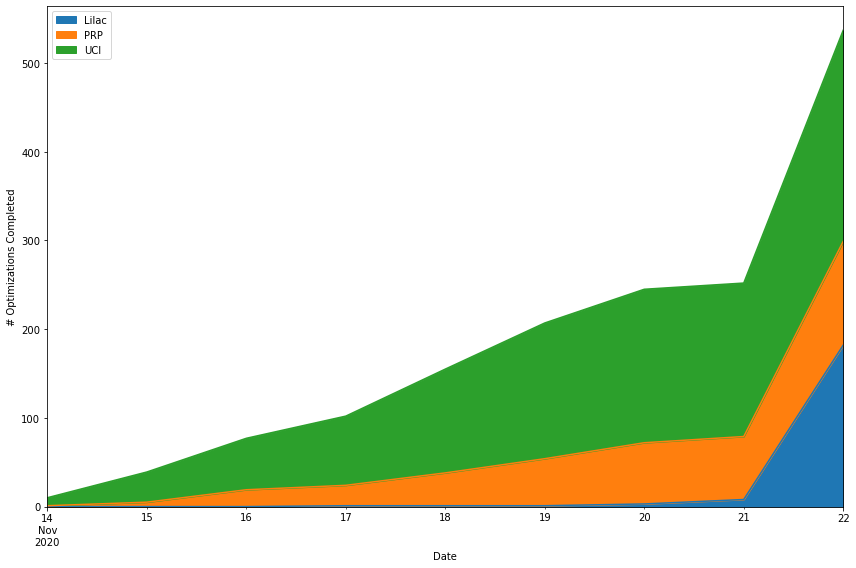

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI'}
counts = {}
for name, group in df_prov.reset_index().set_index('modified_on').groupby('username'):
    counts[name_map[name]] = group.groupby((pd.Grouper(freq='D')))['index'].count()

counts = pd.DataFrame(counts).cumsum()
counts.plot.area(ax=ax)
ax.legend()

ax.set_ylabel("# Optimizations Completed")
ax.set_xlabel("Date")

fig.tight_layout()
fig.savefig('throughput_cumulative.pdf', dpi=300)

## Findings and Recommendations

Findings:
1. Throughput is increasing on this dataset.
2. Trevor's managers are largely responsible for this dataset's advancement.
3. Mean execution time across resources is 13 hours. Can vary upward by up to 60 hours.

Recommendations:
1. Up priority to "high" for this dataset for now. Examine if this increases throughput for each resource.
2. Increase John's commitment of QM workers.

## Upping priority

In [74]:
from qcportal.models.task_models import PriorityEnum

In [109]:
incomplete = [opt for opt in opts if opt.status != 'COMPLETE']

In [110]:
len(incomplete)

7315